In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# dfClean = pd.read_csv('data/compiledData/dfCleanMortes.csv')
dfClean = pd.read_csv('dfCleanMortes.csv')
dfClean.head()

,Unnamed: 0,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,...,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,NATUREZA_APURADA,CRIME
0,0,DECAP,1ª SEC,São Paulo,001 DP - Sé,10108,2019-01-01 07:56:59,3,2019,S.PAULO,...,400.0,-23.546215,-46.631733,Vítima,Masculino,62.0,1956-04-20 00:00:00,Branca,HOMICÍDIO DOLOSO,Homicídio Doloso
1,1,DECAP,1ª SEC,São Paulo,001 DP - Sé,10101,2019-01-18 16:32:41,372,2019,S.PAULO,...,8.0,-23.554690,-46.629651,Vítima,Masculino,44.0,1974-10-06 00:00:00,Parda,HOMICÍDIO DOLOSO,Homicídio Doloso
2,3,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-20 00:15:18,534,2019,S.PAULO,...,542.0,-23.560415,-46.633707,Vítima,Masculino,40.0,1978-11-23 00:00:00,Amarela,HOMICÍDIO DOLOSO,Homicídio Doloso
3,4,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-23 00:07:25,624,2019,S.PAULO,...,1645.0,-23.562964,-46.645501,Vítima,Feminino,57.0,1961-08-25 00:00:00,Branca,HOMICÍDIO DOLOSO,Homicídio Doloso
4,8,DECAP,2ª SEC,São Paulo,095 DP - Heliópolis,10358,2019-01-24 11:54:50,259,2019,S.PAULO,...,276.0,-23.607535,-46.595688,Vítima,Masculino,25.0,1993-10-26 00:00:00,Parda,HOMICÍDIO DOLOSO,Homicídio Doloso


# Analise Univariada

[1365, 818, 152, 61, 49]


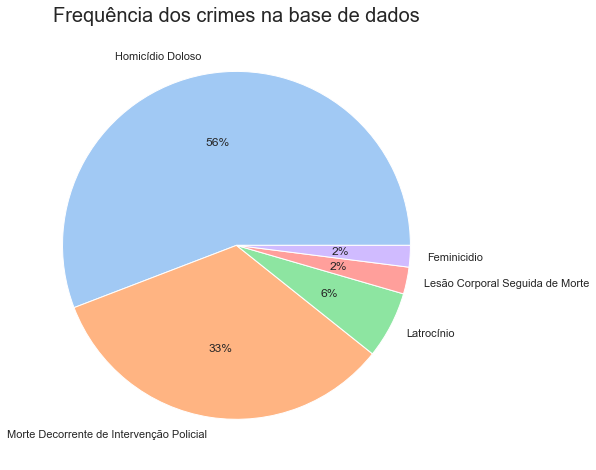

In [9]:
crime_counts = dfClean.CRIME.value_counts()

sns.set(rc={'figure.figsize':(16,8)})

x = list(crime_counts.keys())
y = list(crime_counts.values)
print(y)
# sns.barplot(x=x, y=y, palette="GnBu_d")
plt.pie(y,labels=x,colors = sns.color_palette('pastel')[0:len(x)], autopct='%.0f%%')

plt.title("Frequência dos crimes na base de dados", fontdict = {'fontsize': 20})
plt.show()

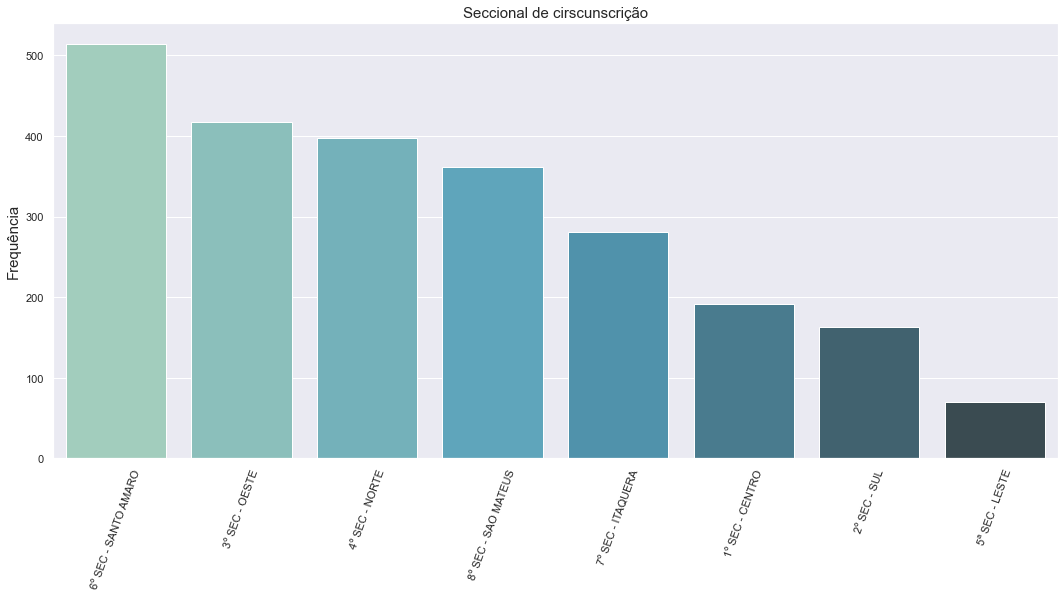

In [8]:
map_sec = {
    "1ª SEC" : "1º SEC - CENTRO",
    "DEL.SEC.1º CENTRO" : "1º SEC - CENTRO",
    "2ª SEC" : "2º SEC - SUL",
    "DEL.SEC.2º SUL" : "2º SEC - SUL",
    "3ª SEC" : "3º SEC - OESTE",
    "DEL.SEC.3º OESTE" : "3º SEC - OESTE",
    "4ª SEC" : "4º SEC - NORTE",
    "DEL.SEC.4º NORTE" : "4º SEC - NORTE",
    "5ª SEC" : "5ª SEC - LESTE",
    "DEL.SEC.5º LESTE " : "5º SEC - LESTE",
    "6ª SEC" : "6º SEC - SANTO AMARO",
    "DEL.SEC.6º SANTO AMARO" : "6º SEC - SANTO AMARO",
    "7ª SEC" : "7º SEC - ITAQUERA",
    "DEL.SEC.7º ITAQUERA" : "7º SEC - ITAQUERA",
    "8ª SEC" : "8º SEC - SAO MATEUS",
    "DEL.SEC.8º SAO MATEUS" : "8º SEC - SAO MATEUS"}

sec_counts = dfClean.SECCIONAL_CIRCUNSCRICAO.map(map_sec).value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(sec_counts.keys())
y = list(sec_counts.values)
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=70)
plt.title("Seccional de cirscunscrição", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

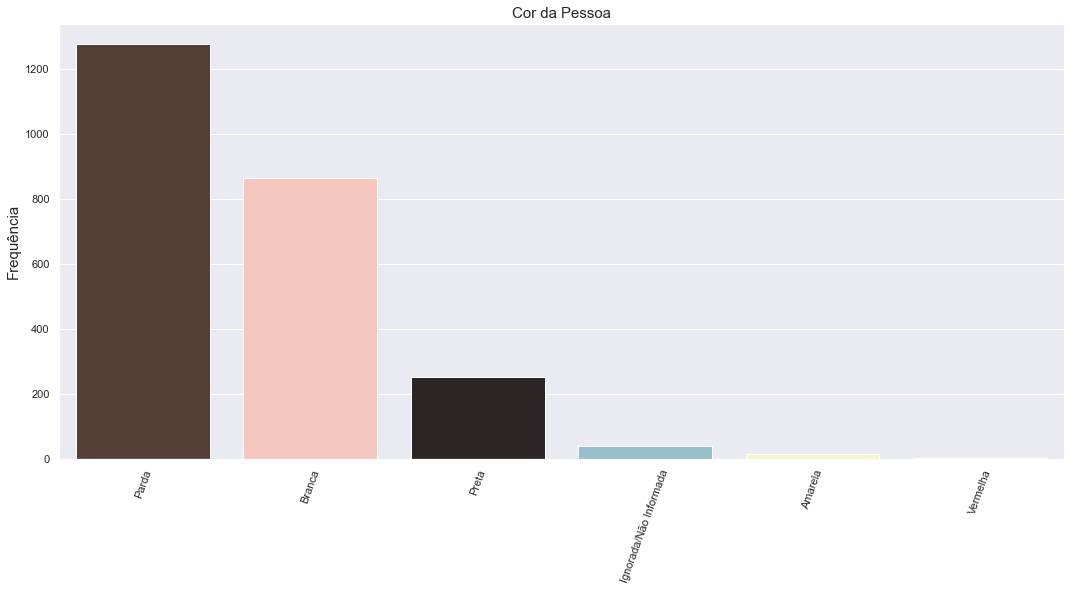

In [10]:
color_counts = dfClean.COR_PELE.str.strip().replace({'Ignorada':'Ignorada/Não Informada','Não informada':'Ignorada/Não Informada'}).value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(color_counts.keys())
y = list(color_counts.values)
sns.barplot(x=x, y=y, palette= sns.color_palette(['#5C3D2E','#FFC1B6','#2D2424','#8FC1D4','#FDFFBC','#B85C38']))
plt.xticks(rotation=70)
plt.title("Cor da Pessoa", fontdict = {'fontsize': 15})
plt.ylabel("Frequência", fontdict={'fontsize': 15})
plt.show()

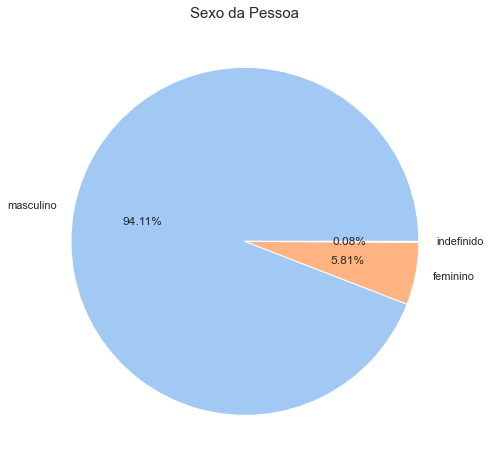

In [13]:
sex_counts = dfClean.SEXO_PESSOA.str.strip().str.lower().value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(sex_counts.keys())
y = list(sex_counts.values)
plt.pie(y,labels=x,colors = sns.color_palette('pastel')[0:len(x)], autopct='%.2f%%')
plt.xticks(rotation=70)
plt.title("Sexo da Pessoa", fontdict = {'fontsize': 15})

plt.show()